# Description:
Banks earn a major revenue from lending loans. But it is often associated with risk. The borrower's may default on the loan. To mitigate this issue, the banks have decided to use Machine Learning to overcome this issue. They have collected past data on the loan borrowers & would like you to develop a strong ML Model to classify if any new borrower is likely to default or not.

The dataset is enormous & consists of multiple deteministic factors like borrowe's income, gender, loan pupose etc. The dataset is subject to strong multicollinearity & empty values. Can you overcome these factors & build a strong classifier to predict defaulters?

# Objective:
Understand the Dataset & cleanup (if required).
Build classification model to predict weather the loan borrower will default or not.
Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

# Extra Comments

It seems that the traget is "Status". We are facing a classificaiton questoin.

Information about some features:
LRV: Load-to-value ratio

In [1]:
# import pandas and numpy for data preprocessing 
import pandas as pd
import numpy as np

# import seaborn and matplotlib for visualisatoin
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [30]:
# Check out the datatype with info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143942 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         143942 non-null  int64  
 1   year                       143942 non-null  int64  
 2   loan_limit                 143942 non-null  object 
 3   Gender                     143942 non-null  object 
 4   approv_in_adv              143942 non-null  object 
 5   loan_type                  143942 non-null  object 
 6   loan_purpose               143942 non-null  object 
 7   Credit_Worthiness          143942 non-null  object 
 8   open_credit                143942 non-null  object 
 9   business_or_commercial     143942 non-null  object 
 10  loan_amount                143942 non-null  int64  
 11  rate_of_interest           143942 non-null  float64
 12  Interest_rate_spread       143942 non-null  float64
 13  Upfront_charges            14

In [4]:
# function to calculate the percentage of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Data preprocessing

## Processing missing values

In [5]:
# displaying missing values and % of totla values
missing_values_table(df)

Your selected dataframe has 34 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Upfront_charges,39642,26.7
Interest_rate_spread,36639,24.6
rate_of_interest,36439,24.5
dtir1,24121,16.2
property_value,15098,10.2
LTV,15098,10.2
income,9150,6.2
loan_limit,3344,2.2
approv_in_adv,908,0.6
age,200,0.1


In [6]:
# Removing featurees with null values less than 3%
df.dropna(subset=['term','Neg_ammortization','loan_purpose','submission_of_application','age','approv_in_adv','loan_limit'],
          inplace=True)

In [7]:
# checking missing values again
missing_values_table(df)

Your selected dataframe has 34 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Upfront_charges,38307,26.6
rate_of_interest,35255,24.5
Interest_rate_spread,35255,24.5
dtir1,23305,16.2
property_value,14597,10.1
LTV,14597,10.1
income,8834,6.1


## Observing value counts fo missing values 

In [8]:
df['Upfront_charges'].value_counts()

0.00       20115
1250.00     1144
1150.00      877
795.00       474
295.00       383
           ...  
5660.38        1
1906.51        1
2539.85        1
235.70         1
4323.33        1
Name: Upfront_charges, Length: 56722, dtype: int64

In [9]:
df['Upfront_charges'].value_counts()

0.00       20115
1250.00     1144
1150.00      877
795.00       474
295.00       383
           ...  
5660.38        1
1906.51        1
2539.85        1
235.70         1
4323.33        1
Name: Upfront_charges, Length: 56722, dtype: int64

In [10]:
df['Interest_rate_spread'].value_counts()

-0.0280    75
-0.0380    64
-0.0230    60
-0.1480    52
-0.1730    52
           ..
 1.6423     1
-0.4832     1
 1.8397     1
 1.0516     1
-0.3247     1
Name: Interest_rate_spread, Length: 22417, dtype: int64

In [11]:
df['dtir1'].value_counts()

37.0    6633
36.0    6357
44.0    6289
49.0    6119
43.0    5153
42.0    4944
41.0    4726
40.0    4541
39.0    4388
38.0    4316
45.0    4297
48.0    4274
30.0    4136
31.0    4093
47.0    4092
46.0    3974
35.0    2585
33.0    2576
32.0    2542
34.0    2512
20.0    2052
24.0    1771
29.0    1737
22.0    1721
28.0    1700
23.0    1680
26.0    1662
27.0    1632
25.0    1603
21.0    1579
60.0     812
54.0     801
57.0     791
59.0     785
55.0     770
52.0     764
53.0     762
51.0     755
58.0     732
50.0     720
56.0     713
61.0     670
16.0     432
8.0      421
19.0     419
13.0     409
6.0      403
17.0     401
11.0     389
18.0     385
9.0      382
14.0     381
10.0     376
12.0     371
5.0      371
15.0     370
7.0      368
Name: dtir1, dtype: int64

In [12]:
df['property_value'].value_counts()

308000.0     2697
258000.0     2673
358000.0     2591
328000.0     2458
408000.0     2442
             ... 
4758000.0       1
2968000.0       1
3488000.0       1
3018000.0       1
2698000.0       1
Name: property_value, Length: 382, dtype: int64

In [13]:
df['LTV'].value_counts()

81.250000    515
91.666667    477
80.038760    368
80.032468    316
94.956140    308
            ... 
89.047151      1
42.486339      1
15.223735      1
60.102533      1
32.802013      1
Name: LTV, Length: 8422, dtype: int64

In [14]:
df['income'].value_counts()

0.0         1233
4200.0      1202
3600.0      1201
4800.0      1153
3120.0      1135
            ... 
54300.0        1
137760.0       1
145560.0       1
93540.0        1
79920.0        1
Name: income, Length: 989, dtype: int64

In [15]:
df['Upfront_charges'].fillna(df['Upfront_charges'].mean(), inplace=True)
df['rate_of_interest'].fillna(df['rate_of_interest'].mean(), inplace=True)
df['Interest_rate_spread'].fillna(df['Interest_rate_spread'].mean(), inplace=True)
df['dtir1'].fillna(df['dtir1'].mean(), inplace=True)
df['property_value'].fillna(df['property_value'].mean(), inplace=True)
df['LTV'].fillna(df['LTV'].mean(), inplace=True)
df['income'].fillna(df['income'].mean(), inplace=True)

In [16]:
missing_values_table(df)

Your selected dataframe has 34 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143942 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         143942 non-null  int64  
 1   year                       143942 non-null  int64  
 2   loan_limit                 143942 non-null  object 
 3   Gender                     143942 non-null  object 
 4   approv_in_adv              143942 non-null  object 
 5   loan_type                  143942 non-null  object 
 6   loan_purpose               143942 non-null  object 
 7   Credit_Worthiness          143942 non-null  object 
 8   open_credit                143942 non-null  object 
 9   business_or_commercial     143942 non-null  object 
 10  loan_amount                143942 non-null  int64  
 11  rate_of_interest           143942 non-null  float64
 12  Interest_rate_spread       143942 non-null  float64
 13  Upfront_charges            14

In [29]:
# a "for loop" for displaying unique values of the features
for i in range(0, len(df.columns)):
    print(f"""
        <<< {df.columns[i]} >>>
        """,df[df.columns[i]].unique())


        <<< ID >>>
         [ 24890  24891  24892 ... 173557 173558 173559]

        <<< year >>>
         [2019]

        <<< loan_limit >>>
         ['cf' 'ncf']

        <<< Gender >>>
         ['Sex Not Available' 'Male' 'Joint' 'Female']

        <<< approv_in_adv >>>
         ['nopre' 'pre']

        <<< loan_type >>>
         ['type1' 'type2' 'type3']

        <<< loan_purpose >>>
         ['p1' 'p4' 'p3' 'p2']

        <<< Credit_Worthiness >>>
         ['l1' 'l2']

        <<< open_credit >>>
         ['nopc' 'opc']

        <<< business_or_commercial >>>
         ['nob/c' 'b/c']

        <<< loan_amount >>>
         [ 116500  206500  406500  456500  696500  706500  346500  376500  436500
  136500  466500  226500   76500  356500  156500  586500  306500  316500
  336500  476500  196500  186500  246500  216500  506500  266500  656500
  256500  396500  166500  236500  866500  416500  386500  596500  606500
   86500  426500  286500  146500  446500  636500  486500  326500   56500



        <<< credit_type >>>
         ['EXP' 'EQUI' 'CRIF' 'CIB']

        <<< Credit_Score >>>
         [758 552 834 587 602 864 860 580 788 723 501 884 520 773 685 846 534 629
 688 668 692 620 518 812 647 683 705 591 889 651 716 780 799 766 868 765
 673 876 886 772 640 798 858 543 555 603 808 519 786 769 556 567 632 818
 584 750 838 741 665 783 663 612 739 571 870 793 804 801 711 634 764 865
 593 511 533 677 774 638 644 732 586 642 872 734 639 506 664 670 577 857
 653 595 787 560 613 514 867 717 619 600 524 883 503 887 604 648 797 806
 845 815 585 729 538 791 671 572 755 760 578 836 900 777 667 880 820 568
 805 590 892 869 737 831 608 803 795 674 781 545 796 660 850 851 794 866
 611 621 829 848 775 733 700 702 882 686 652 844 649 557 761 569 523 740
 690 616 782 601 809 855 768 627 854 762 746 592 703 697 710 522 789 898
 693 597 680 575 694 581 678 714 871 800 853 540 718 713 874 625 626 500
 695 517 759 792 822 516 704 605 539 598 763 515 508 529 830 551 715 802
 743 699 617 661 89

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143942 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         143942 non-null  int64  
 1   year                       143942 non-null  int64  
 2   loan_limit                 143942 non-null  object 
 3   Gender                     143942 non-null  object 
 4   approv_in_adv              143942 non-null  object 
 5   loan_type                  143942 non-null  object 
 6   loan_purpose               143942 non-null  object 
 7   Credit_Worthiness          143942 non-null  object 
 8   open_credit                143942 non-null  object 
 9   business_or_commercial     143942 non-null  object 
 10  loan_amount                143942 non-null  int64  
 11  rate_of_interest           143942 non-null  float64
 12  Interest_rate_spread       143942 non-null  float64
 13  Upfront_charges            14

C:\Users\shahinSabour\AppData\Local\Temp\ipykernel_2760\2522470803.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df1.corr()


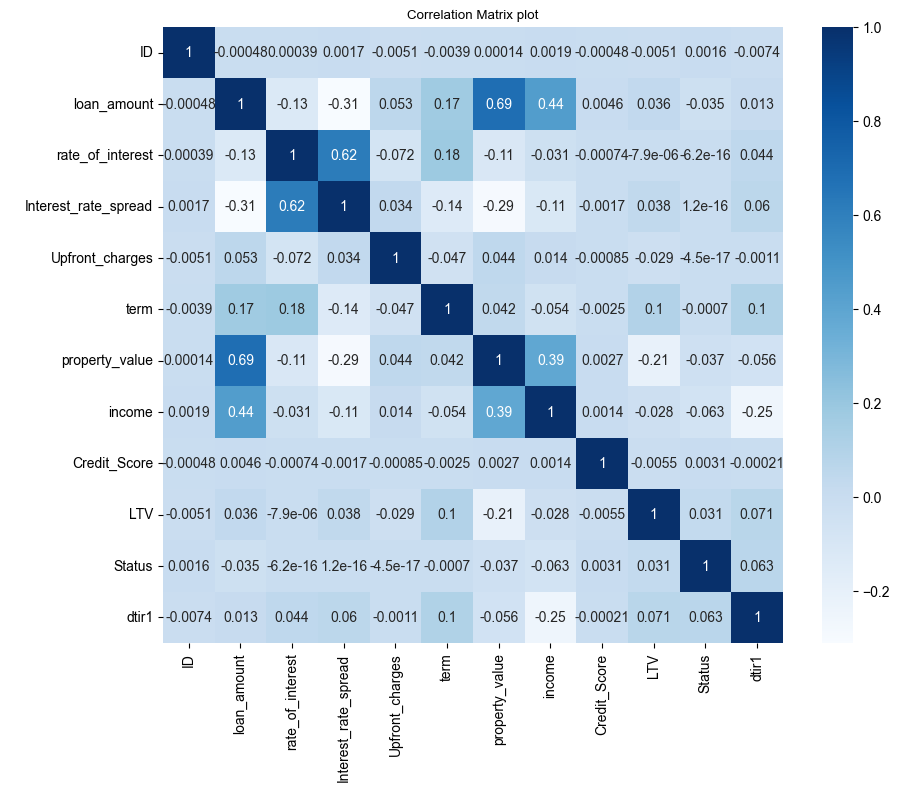

In [20]:
# Correlation matrix
df1 = df.copy()
df1.drop('year',axis=1, inplace=True)

plt.figure(figsize=(10,8))
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True, cmap = "Blues")
sns.set(font_scale=0.8)
plt.title("Correlation Matrix plot")
plt.show()

In [21]:
# produce pivot table 
table = pd.pivot_table(df, index=['Gender','age'], values='Status',aggfunc = ['sum', len, 'mean'])
table

sum    len      mean
                        Status Status    Status
Gender            age                          
Female            25-34    682   2918  0.233722
                  35-44   1208   5191  0.232710
                  45-54   1555   6276  0.247769
                  55-64   1631   6380  0.255643
                  65-74   1091   4024  0.271123
                  <25       64    224  0.285714
                  >74      408   1386  0.294372
Joint             25-34    944   5592  0.168813
                  35-44   1537   9422  0.163129
                  45-54   1723   9206  0.187161
                  55-64   1722   8148  0.211340
                  65-74   1215   5650  0.215044
                  <25       67    286  0.234266
                  >74      459   1888  0.243114
Male              25-34   1504   6540  0.229969
                  35-44   2374  10050  0.236219
                  45-54   2489   9795  0.254109
                  55-64   2286   8086  0.282711
                  65-74   1332   4397  0.302934
                  <25      168    555  0.302703
                  >74      539   1559  0.345734
Sex Not Available 25-34    970   3444  0.281649
                  35-44   1945   7151  0.271990
                  45-54   2306   8401  0.274491
                  55-64   2509   8917  0.281373
                  65-74   1765   6073  0.290631
                  <25       77    230  0.334783
                  >74      685   2153  0.318161

Text(0, 0.5, 'Status')

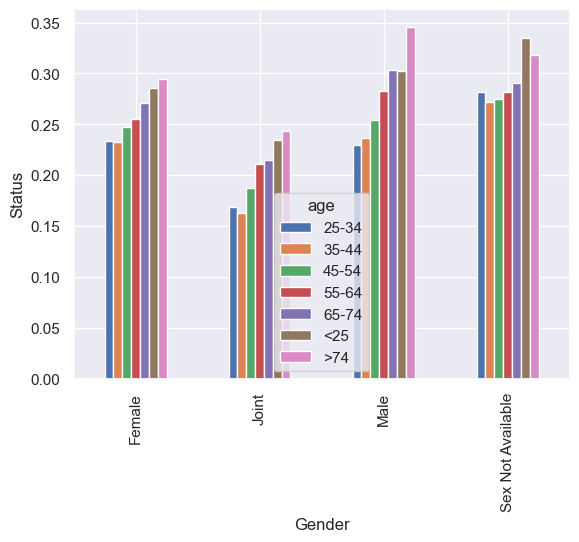

In [22]:
# plot of Gender & age vs Status
sns.set()
pd.pivot_table(df, index='Gender', columns='age', values='Status',aggfunc='mean').plot(kind='bar')
plt.ylabel('Status')

In [23]:
table = pd.pivot_table(df, index=['loan_type','business_or_commercial','credit_type'], values='Status',aggfunc = ['sum', len, 'mean'])
table

sum    len      mean
                                             Status Status    Status
loan_type business_or_commercial credit_type                        
type1     nob/c                  CIB           5151  36685  0.140412
                                 CRIF          4839  33180  0.145841
                                 EQUI         10681  10682  0.999906
                                 EXP           4222  29106  0.145056
type2     b/c                    CIB           1588   6081  0.261141
                                 CRIF          1471   5698  0.258161
                                 EQUI          2213   2213  1.000000
                                 EXP           1510   5923  0.254938
type3     nob/c                  CIB            622   3959  0.157110
                                 CRIF           593   3676  0.161317
                                 EQUI          1702   1702  1.000000
                                 EXP            663   5037  0.131626

Text(0, 0.5, 'Status')

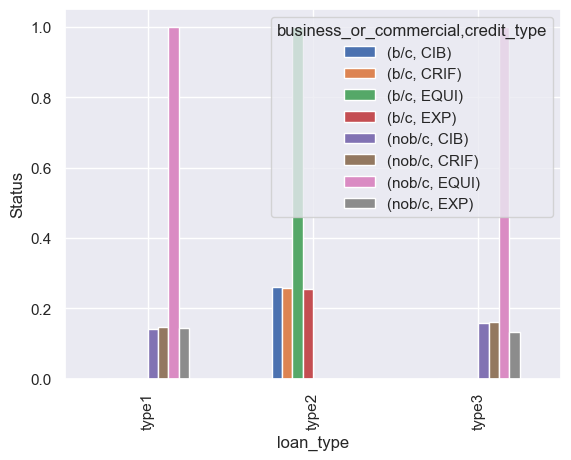

In [24]:
# plot of loan_type & business_or_commercial and credit_type vs Status
sns.set()
pd.pivot_table(df, index='loan_type', columns=['business_or_commercial','credit_type'], values='Status',aggfunc='mean').plot(kind='bar')
plt.ylabel('Status')

In [25]:
table = pd.pivot_table(df, index=['Region'], values='Status',aggfunc = ['sum', len, 'mean'])
table

,sum,len,mean
,Status,Status,Status
Region,,,
North,16259,72410,0.224541
North-East,364,1206,0.301824
central,2311,8404,0.274988
south,16321,61922,0.263574


Text(0, 0.5, 'Status')

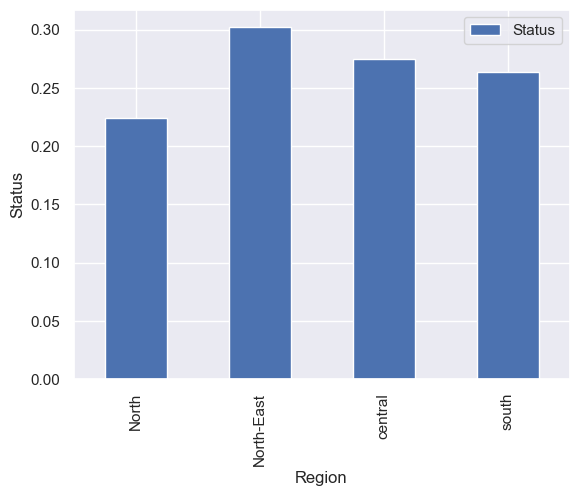

In [26]:
# plot of Region vs Status
sns.set()
pd.pivot_table(df, index='Region', values='Status',aggfunc='mean').plot(kind='bar')
plt.ylabel('Status')

<AxesSubplot: xlabel='property_value', ylabel='income'>

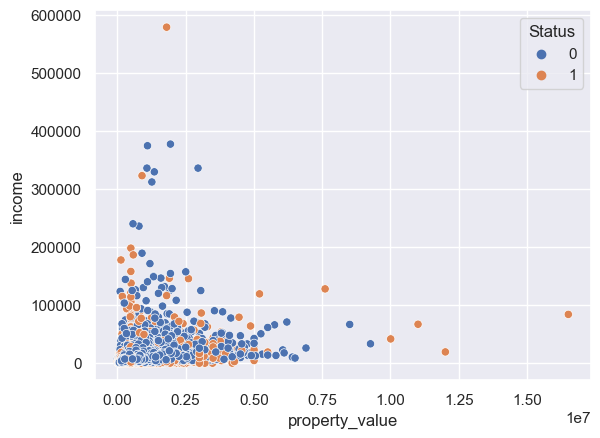

In [27]:
# scatterplot of property_value vs income
sns.scatterplot(x=df['property_value'],y=df['income'], hue=df['Status'])

<AxesSubplot: xlabel='loan_amount', ylabel='income'>

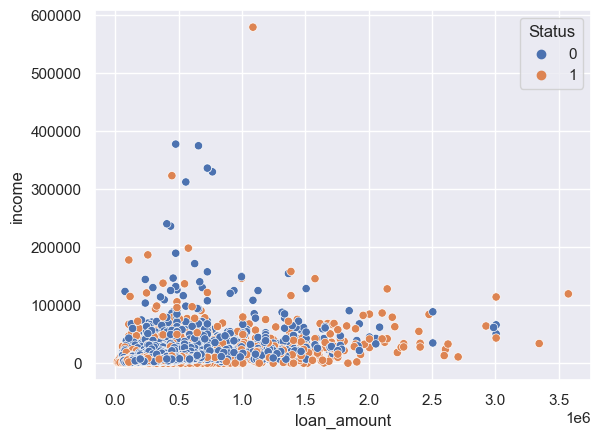

In [28]:
# scatterplot of loan_amount vs income
sns.scatterplot(x=df['loan_amount'],y=df['income'], hue=df['Status'])